# 1) Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import r2_score , mean_squared_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import warnings
import joblib
import os

%matplotlib inline
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(12,10)})

# 2) Readinig Data

In [2]:
FilePath = os.path.join(os.getcwd() , 'Hatla2ee-Egypt-Used-Car-V5.CSV')
df = pd.read_csv(FilePath)
df.drop('Unnamed: 0' , axis=1,inplace=True)

In [3]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Brand,Volkswagen,Nissan,Kia,Mercedes,Land Rover,Mercedes,Mercedes,Land Rover,Hyundai,Mercedes
Model,Beetle,Qashqai,Sportage,C 200,Defender,S 500,CLA 180,Velar,Tucson Turbo GDI,E 200
Body,Hatchback,SUV,SUV,Sedan,4X4,Sedan,Sedan,4X4,SUV,Sedan
Transmission,Manual,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic
Year,1975,2022,2021,2019,2021,2021,2022,2021,2019,2022
Fule,Gas,Gas,Gas,Gas,Gas,Gas,Gas,Gas,Gas,Gas
Engine_CC,1600,1300,1600,1500,2000,3000,1333,2000,1600,2000
Kilometers_Driven,100000,8500,31000,90000,8000,2600,10,0,105000,20
Color,Blue,Blue,Gray,White,Mocha,Black,Gold,White,Gray,Blue
City,Heliopolis,Cairo,Suez,Heliopolis,Heliopolis,Heliopolis,Heliopolis,Heliopolis,Tagamo3 - New Cairo,Nasr city


In [4]:
df.shape

(8831, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8831 entries, 0 to 8830
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brand              8831 non-null   object
 1   Model              8831 non-null   object
 2   Body               8831 non-null   object
 3   Transmission       8831 non-null   object
 4   Year               8831 non-null   int64 
 5   Fule               8831 non-null   object
 6   Engine_CC          8831 non-null   int64 
 7   Kilometers_Driven  8831 non-null   int64 
 8   Color              8831 non-null   object
 9   City               8831 non-null   object
 10  Price              8831 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 759.0+ KB


In [6]:
## Number Of Unique Values IN Columns
pd.DataFrame({'Columns': df.columns , 'Number of unique values':  df.nunique().values})

,Columns,Number of unique values
0,Brand,75
1,Model,566
2,Body,11
3,Transmission,2
4,Year,53
5,Fule,5
6,Engine_CC,70
7,Kilometers_Driven,551
8,Color,24
9,City,98


In [7]:
df['Color'].unique()

array(['Blue', 'Gray', 'White', 'Mocha', 'Black', 'Gold', 'Silver',
       'Dark red', 'Bronze', 'Red', 'Champagne', 'Dark green',
       'Light grey', 'Beige', 'Dark blue', 'Green', 'Eggplant', 'Brown',
       'Cyan', 'Yellow', 'Petroleum', 'Purple', 'Olive', 'Orange'],
      dtype=object)

In [8]:
df['Color'].value_counts()

Silver        3978
Black         1085
White          758
Gray           612
Red            503
Blue           292
Light grey     264
Dark red       260
Dark blue      196
Gold           175
Cyan           106
Mocha          102
Brown           79
Green           77
Bronze          67
Petroleum       64
Champagne       52
Dark green      43
Beige           33
Eggplant        23
Olive           19
Yellow          16
Purple          16
Orange          11
Name: Color, dtype: int64

In [9]:
## Show number of unique value en each column
## Print top 5 largest value   
for col in df.columns:
    print( col,':', df[col].nunique() )
    print(df[col].value_counts().nlargest(5))
    print('\n' + '*' * 26 + '\n')

Brand : 75
Hyundai      987
Kia          668
Nissan       604
Chevrolet    558
Toyota       499
Name: Brand, dtype: int64

**************************

Model : 566
Sunny      436
Corolla    357
Cerato     211
Logan      190
Tipo       176
Name: Model, dtype: int64

**************************

Body : 11
Sedan        6702
SUV           927
Hatchback     567
4X4           358
MiniVans      159
Name: Body, dtype: int64

**************************

Transmission : 2
Automatic    6505
Manual       2326
Name: Transmission, dtype: int64

**************************

Year : 53
2021    889
2022    707
2020    696
2019    637
2017    545
Name: Year, dtype: int64

**************************

Fule : 5
Gas            8649
Natural Gas     106
Diesel           60
Hybrid           14
Electric          2
Name: Fule, dtype: int64

**************************

Engine_CC : 70
1600    4888
1500    1720
1400     528
2000     420
1300     400
Name: Engine_CC, dtype: int64

**************************

Kilometers_D

## Dataset Columns Description

>`Brand`: make of a car (BMW, Toyota, and so on)

>`Model`: model of a car

>`year`: year when the car was manufactured

>`Fule`: type of fule the engine needs (Benzine, Diesel, and so on)

>`Transmission`: type of transmission (automatic or manual)

>`Body`: sedan or SUV or Coupe ....

>`Kilometers_Driven`: Number of Kilometers that the car Driven 

>`Color`: The Color OF the car

>`City`: City is where is car is sell in Egypt

>`Price`: Used car price in Egypt

# 3) Exploratory data analysis

Automatic    6505
Manual       2326
Name: Transmission, dtype: int64


<AxesSubplot:xlabel='Transmission', ylabel='Price'>

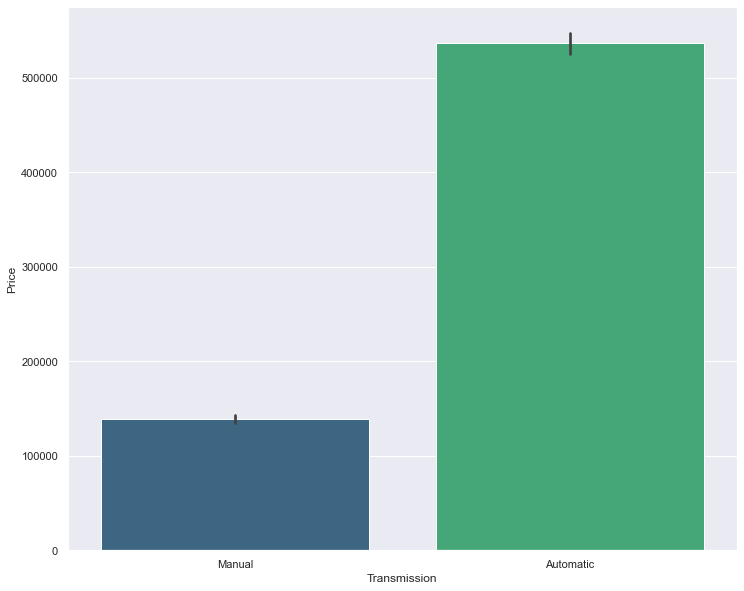

In [10]:
print(df.Transmission.value_counts())
sns.barplot(x = df["Transmission"], y = df["Price"] , palette='viridis')

Hyundai      987
Kia          668
Nissan       604
Chevrolet    558
Toyota       499
            ... 
Hafei          1
Kaiyi          1
Buick          1
Exeed          1
Kenbo          1
Name: Brand, Length: 75, dtype: int64


<AxesSubplot:xlabel='Brand', ylabel='Price'>

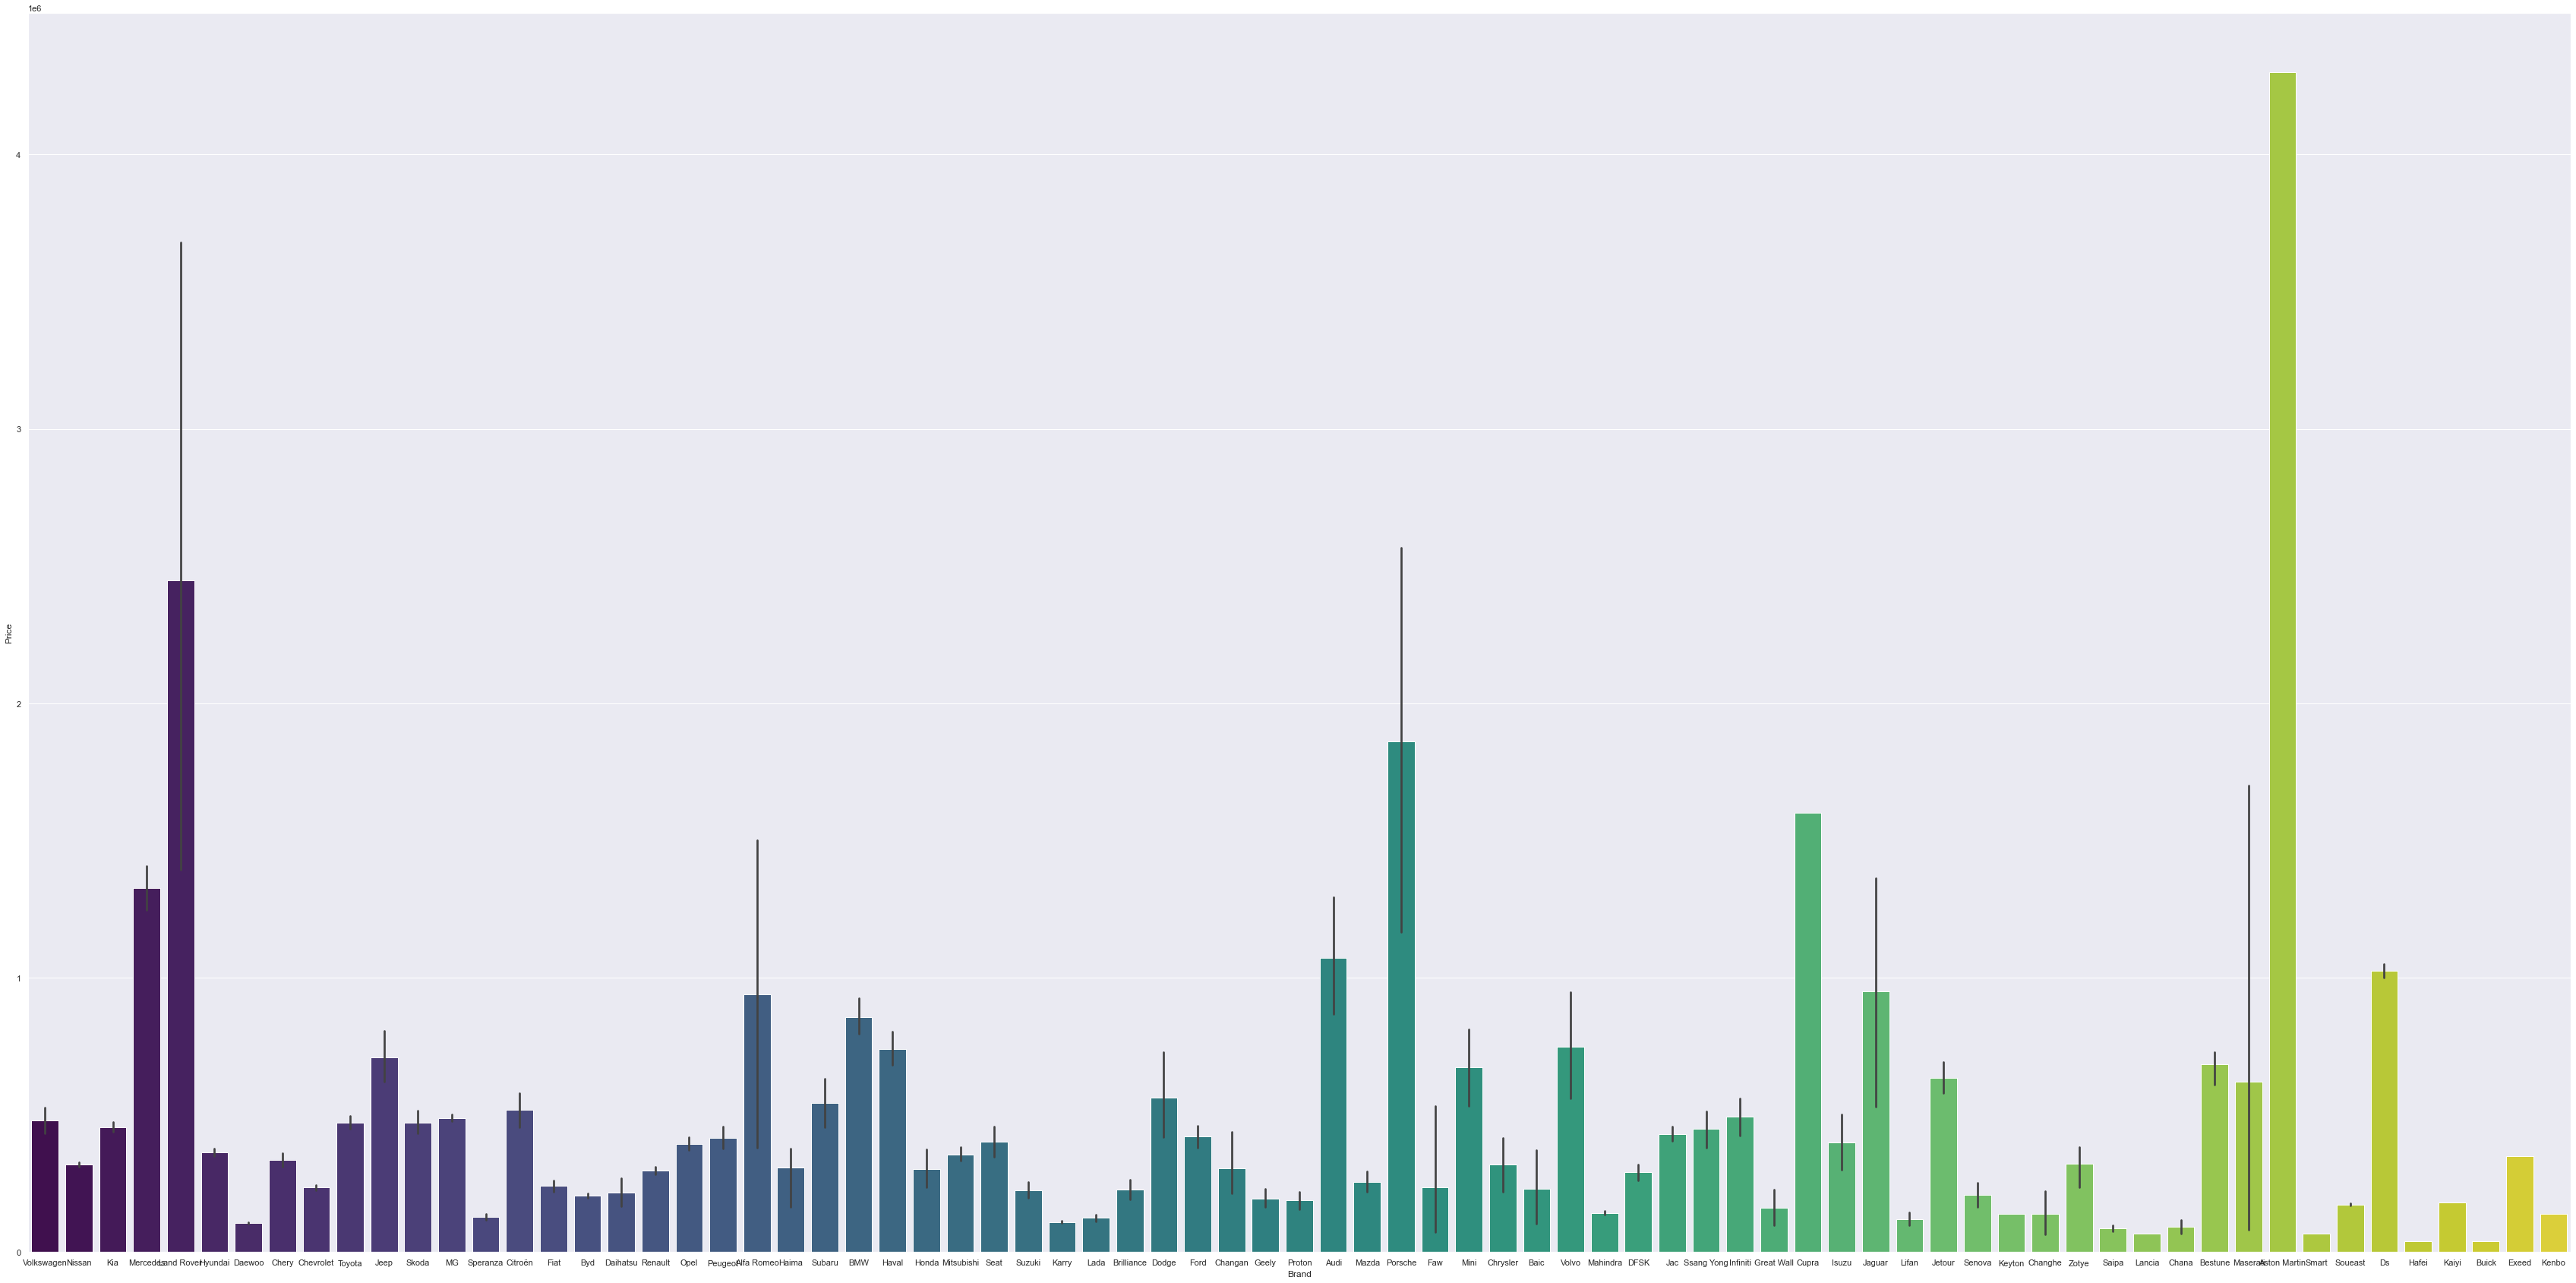

In [11]:
print(df.Brand.value_counts())
sns.set(rc={'figure.figsize':(60,30)})
sns.barplot(x = df["Brand"], y = df["Price"] , palette='viridis')

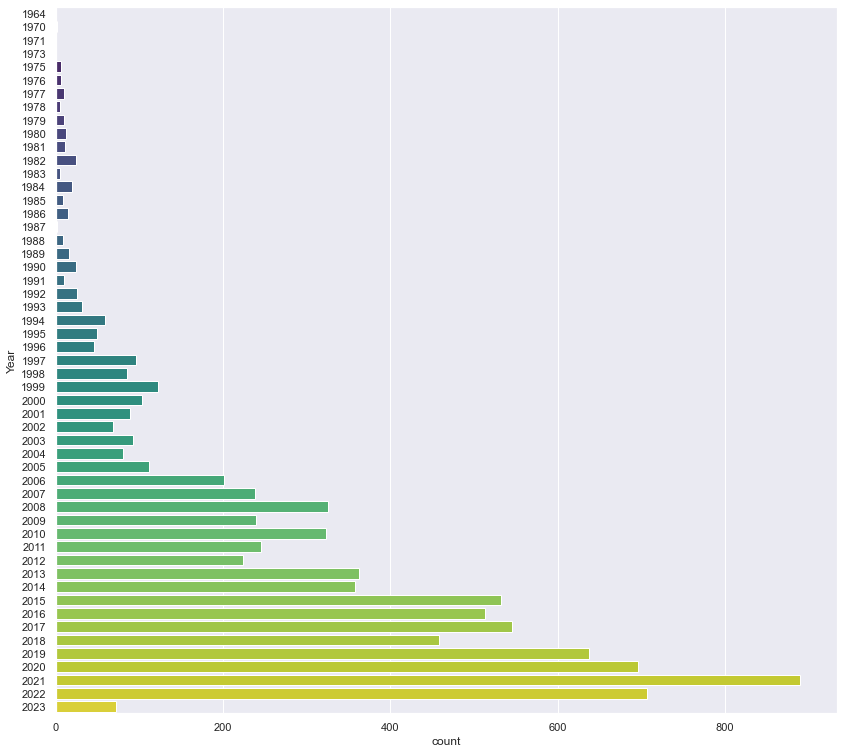

In [12]:
plt.figure(figsize=(14,13))
ax = sns.countplot(y = df["Year"] , palette='viridis');

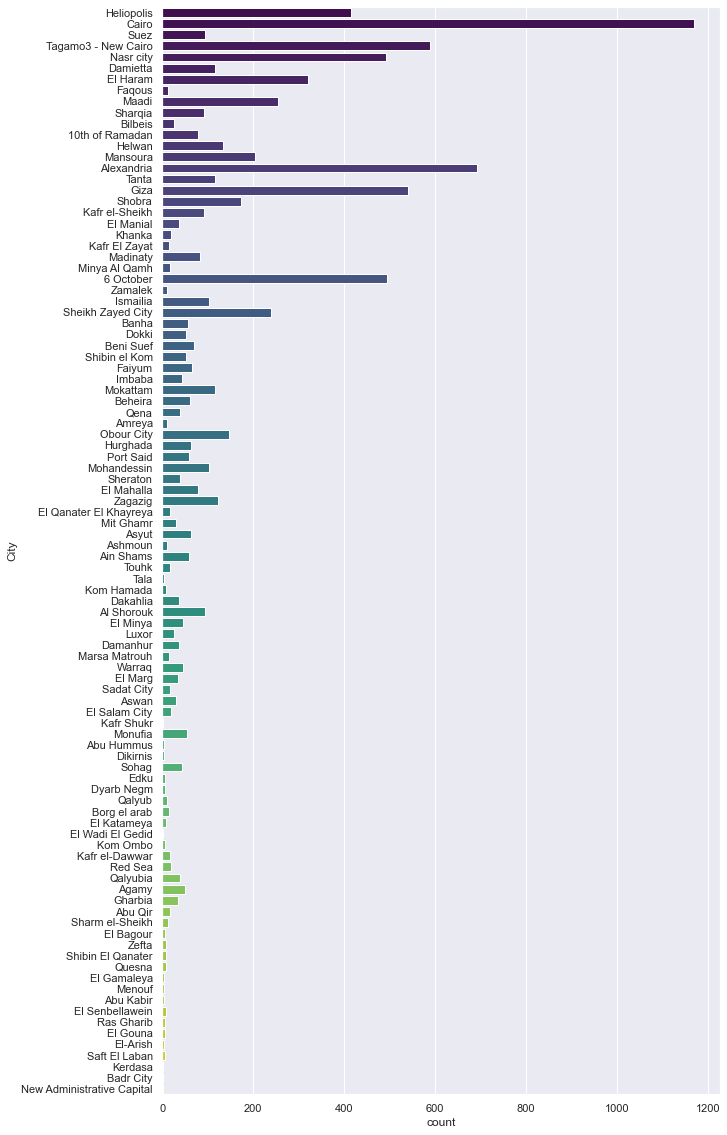

In [13]:
plt.figure(figsize=(10,20))
ax = sns.countplot(y = df["City"] , palette='viridis');

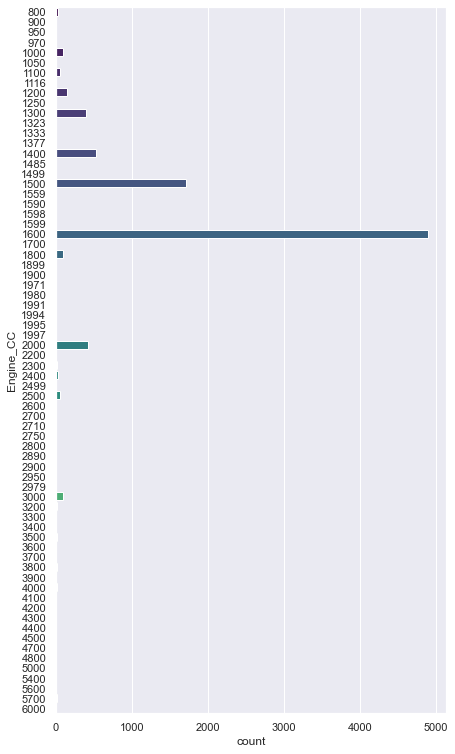

In [14]:
plt.figure(figsize=(7,13))
ax = sns.countplot(y = df["Engine_CC"] , palette='viridis');

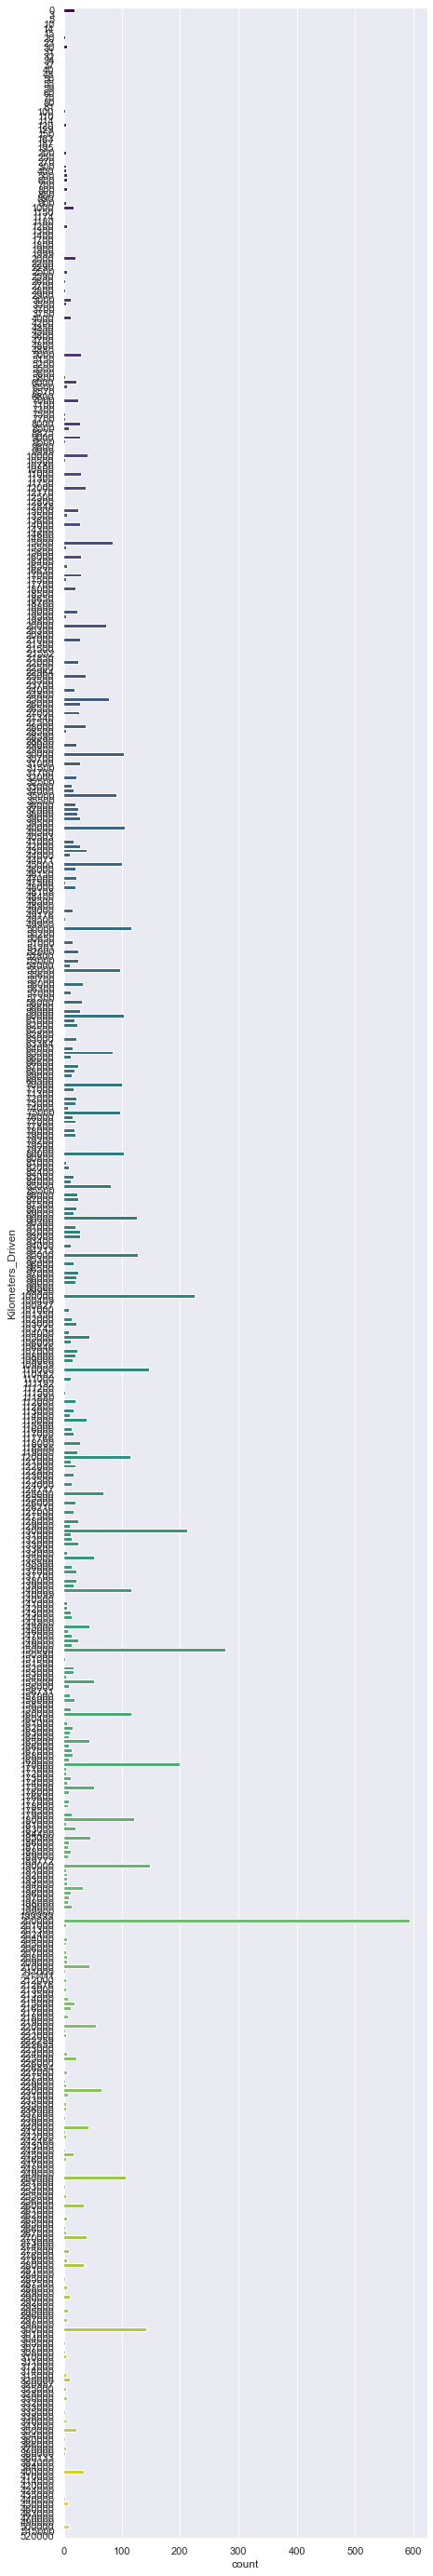

In [15]:
plt.figure(figsize=(7,50))
ax = sns.countplot(y = df["Kilometers_Driven"] , palette='viridis');

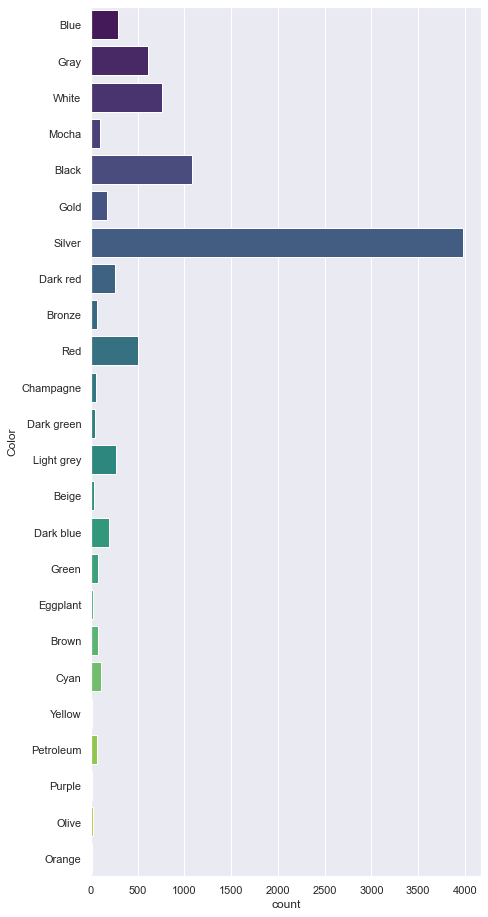

In [16]:
plt.figure(figsize=(7,16))
ax = sns.countplot(y = df["Color"] , palette='viridis');

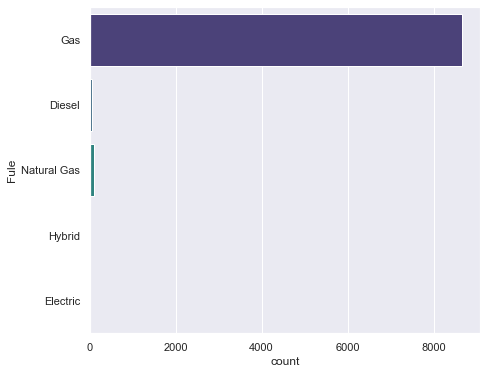

In [17]:
plt.figure(figsize=(7,6))
ax = sns.countplot(y = df["Fule"] , palette='viridis');

# 4) analysis (price)

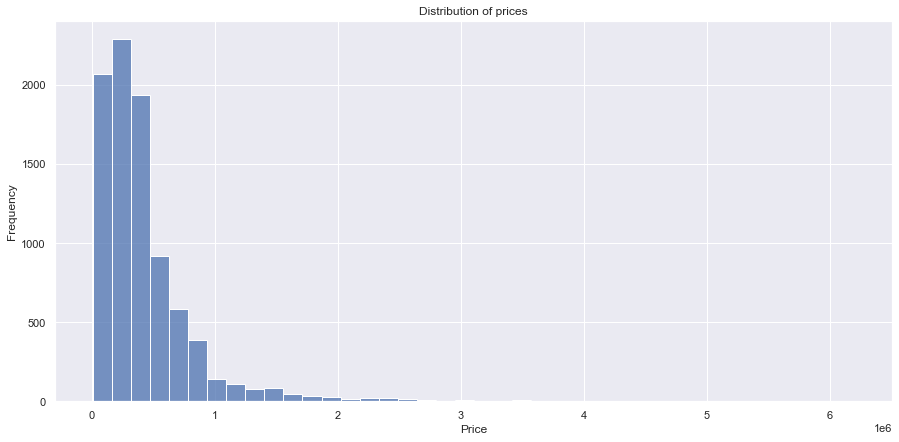

In [18]:
plt.figure(figsize=(15, 7))

sns.histplot(df.Price, bins=40)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

>**This is a `long tail` distribution, which is a typical situation for many items with low prices and very few expensive ones.**

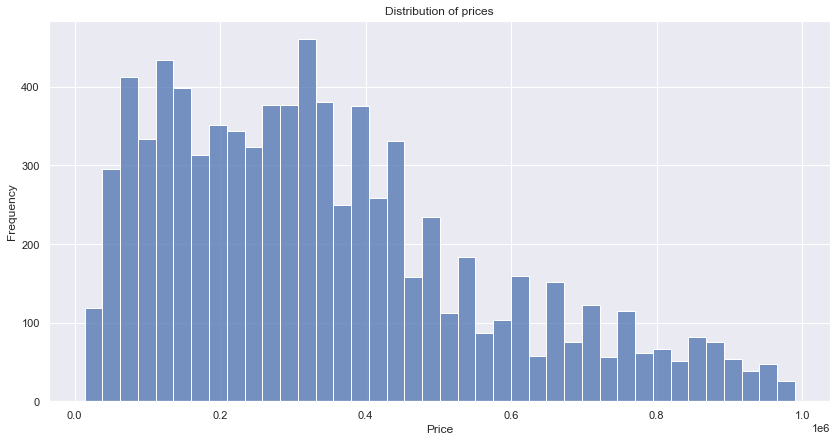

In [19]:
plt.figure(figsize=(14, 7))

sns.histplot(df.Price[df.Price < 1*1000000], bins=40)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

>**The `long tail` makes it quite difficult for us to see the distribution, but it has an even stronger effect on a model: such distribution can greatly confuse the model, so it won’t learn well enough.**
>>**we hande it by using `log transformation`.** 

# 5) Log Transformation For Price

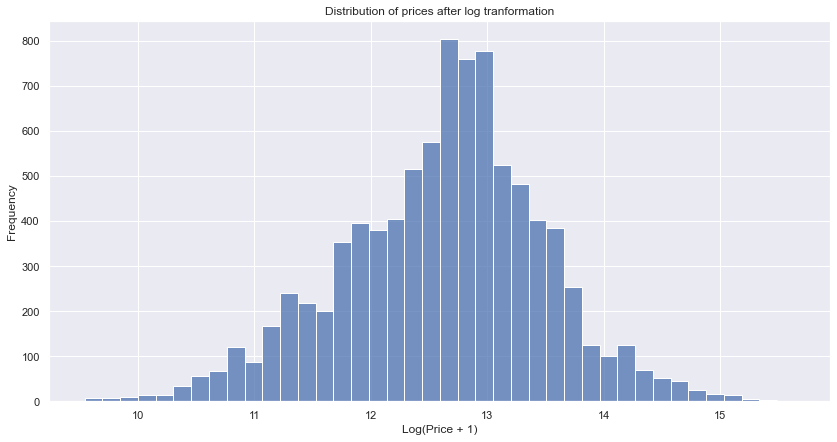

In [20]:
df['log_price'] = np.log1p(df.Price)

plt.figure(figsize=(14, 7))

sns.histplot(df.log_price, bins=40)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()

>**The effect of the `long tail` is removed**

>**The `price+1` part is important in cases that have zeros. The logarithm of zero is minus infinity, but the logarithm of one is zero.** 


# 6) Pre-processing & Feature Engineering

In [21]:
## Take copy from Dataset
df_copy = df.copy()
df_copy.drop('City' , axis=1,inplace=True)

In [22]:
df_copy.shape

(8831, 11)

In [23]:
def color_format(color):
    colors ={
        'Beige': 0,
        'Black': 1,
        'Blue': 2,
        'Bronze': 3,
        'Brown': 4,
        'Champagne': 5,
        'Cyan': 6,
        'Dark blue': 7,
        'Dark green': 8,
        'Dark red': 9,
        'Eggplant': 10,
        'Gold': 11,
        'Gray': 12,
        'Green': 13,
        'Light grey': 14,
        'Mocha': 15,
        'Olive': 16,
        'Orange': 17,
        'Petroleum': 18,
        'Purple': 19,
        'Red': 20,
        'Silver': 21,
        'White': 22,
        'Yellow': 23}
    return colors[color]

def fule_format(fule):
    fule_type = {
        'Diesel': 0, 
        'Electric': 1, 
        'Gas': 2, 
        'Hybrid': 3, 
        'Natural Gas': 4
    }
    return fule_type[fule]

def body_format(body):
    body_type = {
        '4X4': 0,
        'Coupe': 1,
        'Hatchback': 2,
        'Medium truck jumbo': 3,
        'Microbus': 4,
        'Mini Pick up': 5,
        'MiniVans': 6,
        'Pick up': 7,
        'SUV': 8,
        'Sedan': 9,
        'Van': 10,
    }
    return body_type[body]

In [24]:
df_copy.Fule = df_copy.Fule.apply(fule_format)
df_copy.Body = df_copy.Body.apply(body_format)
df_copy.Transmission = df_copy.Transmission.map({'Automatic' : 1 , 'Manual':0})
df_copy.Color = df_copy.Color.apply(color_format)

In [25]:
df_copy.sample(5)

,Brand,Model,Body,Transmission,Year,Fule,Engine_CC,Kilometers_Driven,Color,Price,log_price
6893,Peugeot,301,9,1,2015,2,1600,170000,21,265000,12.487489
4834,Jetour,X70,8,1,2022,2,1500,9000,1,585000,13.279369
4136,Toyota,Corolla,9,1,2022,2,1600,600,22,700000,13.458837
5431,Mercedes,E 280,9,1,2006,2,2800,168000,21,540000,13.199326
2107,Nissan,Sunny,9,1,2016,2,1600,199000,21,270000,12.506181


In [26]:
# Converting categorical features
nums = [] 
lbl= LabelEncoder()

for col in df_copy.loc[ : , df_copy.dtypes == np.object].columns:
    df_copy[col] = lbl.fit_transform(df_copy[col])
    # To know the meaning of numbers
    directory = {label: index for index , label  in enumerate(lbl.classes_)}
    nums.append(directory)
nums

[{'Alfa Romeo': 0,
  'Aston Martin': 1,
  'Audi': 2,
  'BMW': 3,
  'Baic': 4,
  'Bestune': 5,
  'Brilliance': 6,
  'Buick': 7,
  'Byd': 8,
  'Chana': 9,
  'Changan': 10,
  'Changhe': 11,
  'Chery': 12,
  'Chevrolet': 13,
  'Chrysler': 14,
  'Citroën': 15,
  'Cupra': 16,
  'DFSK': 17,
  'Daewoo': 18,
  'Daihatsu': 19,
  'Dodge': 20,
  'Ds': 21,
  'Exeed': 22,
  'Faw': 23,
  'Fiat': 24,
  'Ford': 25,
  'Geely': 26,
  'Great Wall': 27,
  'Hafei': 28,
  'Haima': 29,
  'Haval': 30,
  'Honda': 31,
  'Hyundai': 32,
  'Infiniti': 33,
  'Isuzu': 34,
  'Jac': 35,
  'Jaguar': 36,
  'Jeep': 37,
  'Jetour': 38,
  'Kaiyi': 39,
  'Karry': 40,
  'Kenbo': 41,
  'Keyton': 42,
  'Kia': 43,
  'Lada': 44,
  'Lancia': 45,
  'Land Rover': 46,
  'Lifan': 47,
  'MG': 48,
  'Mahindra': 49,
  'Maserati': 50,
  'Mazda': 51,
  'Mercedes': 52,
  'Mini': 53,
  'Mitsubishi': 54,
  'Nissan': 55,
  'Opel': 56,
  'Peugeot': 57,
  'Porsche': 58,
  'Proton': 59,
  'Renault': 60,
  'Saipa': 61,
  'Seat': 62,
  'Senova': 63

In [27]:
df_copy.sample(5)

,Brand,Model,Body,Transmission,Year,Fule,Engine_CC,Kilometers_Driven,Color,Price,log_price
6262,64,378,9,1,2006,2,1599,300000,21,180000,12.100718
6675,55,476,9,1,2017,2,1600,95000,21,240000,12.388398
2657,35,312,9,1,2022,2,1600,16000,20,490000,13.102163
1930,60,344,9,1,2021,2,1600,124000,21,268000,12.498746
6534,55,476,9,1,2022,2,1500,23000,21,350000,12.765691


In [28]:
df_copy.dtypes

Brand                  int32
Model                  int32
Body                   int64
Transmission           int64
Year                   int64
Fule                   int64
Engine_CC              int64
Kilometers_Driven      int64
Color                  int64
Price                  int64
log_price            float64
dtype: object

### Features Engineerning

In [29]:
df_copy["Car Age"] = 2023 - df_copy["Year"]
df_copy = df_copy.drop(columns = ["Year"])

<AxesSubplot:>

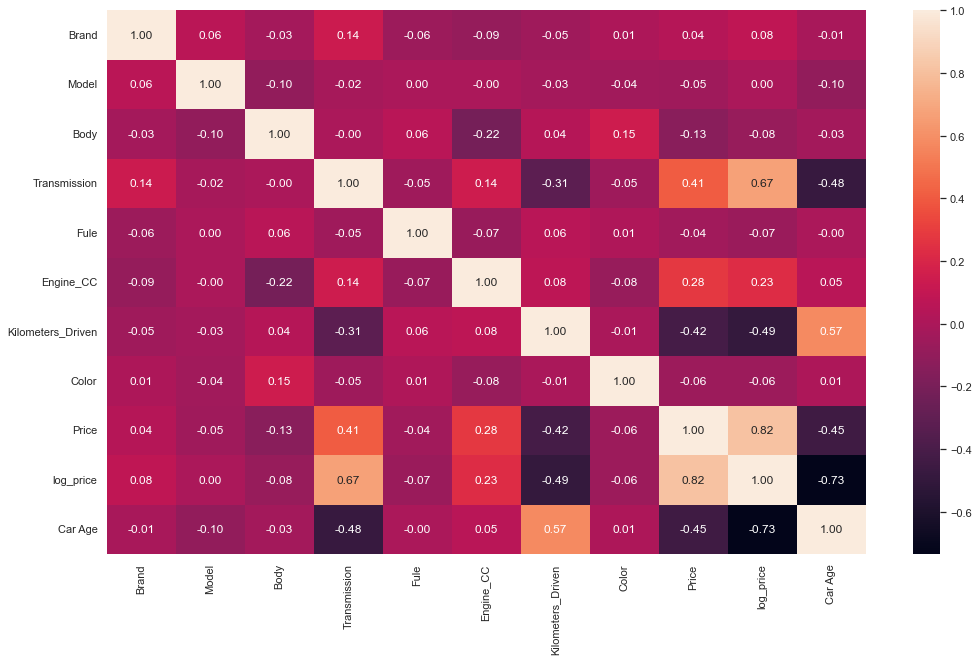

In [30]:
sns.set(rc={'figure.figsize':(17,10)})
sns.heatmap(df_copy.corr(), annot=True, fmt='.2f')

# 7) Build The Model

In [31]:
x = df_copy.drop(columns = ['Price','log_price'])
y = df_copy[['Price']]

In [32]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.2 , random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7064, 9)
(1767, 9)
(7064, 1)
(1767, 1)


In [33]:
models = {
    "KNeighborsRegressor" : KNeighborsRegressor(), 
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "XGBRegressor" : XGBRegressor()
}

In [34]:
for name, model in models.items():
    print(f'Model: {name}')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test) 
    print(f'R2 Score: {round(r2_score(y_test, y_pred)*100 , 1)} %')  
    print(f'Mean Squared Error: {(mean_squared_error(y_test, y_pred)*100 , 1)}')  
    print('*'*30)
    #v5

Model: KNeighborsRegressor
R2 Score: 41.1 %
Mean Squared Error: (11093404382968.42, 1)
******************************
Model: DecisionTreeRegressor
R2 Score: 82.1 %
Mean Squared Error: (3376664972583.789, 1)
******************************
Model: RandomForestRegressor
R2 Score: 92.1 %
Mean Squared Error: (1489951183947.1538, 1)
******************************
Model: XGBRegressor
R2 Score: 93.3 %
Mean Squared Error: (1256217163633.0405, 1)
******************************


## 8) Choose Best Model


In [35]:
RF = RandomForestRegressor()
RF.fit(x_train, y_train)
pred = RF.predict(x_test)

print(f'R2 Score: {round(r2_score(y_test, pred)*100 , 1)} %')  
print(f'Mean Squared Error: {(mean_squared_error(y_test, pred) , 1)}')  

R2 Score: 91.8 %
Mean Squared Error: (15448002797.532919, 1)


In [36]:
XGB = XGBRegressor()
XGB.fit(x_train, y_train)
pred = XGB.predict(x_test)

print(f'R2 Score: {round(r2_score(y_test, pred)*100 , 1)} %')  
print(f'Mean Squared Error: {(mean_squared_error(y_test, pred) , 1)}')  

R2 Score: 93.3 %
Mean Squared Error: (12562171636.330406, 1)


In [41]:
joblib.dump(XGB, 'XGB.pkl')

['XGB.pkl']

In [38]:
#joblib.dump(XGB, 'XGBLogPrice.pkl')

### Model Testing

In [39]:
i = 10
ad = df_copy.iloc[i].to_dict()
ad

{'Brand': 18.0,
 'Model': 337.0,
 'Body': 9.0,
 'Transmission': 0.0,
 'Fule': 2.0,
 'Engine_CC': 1500.0,
 'Kilometers_Driven': 175000.0,
 'Color': 21.0,
 'Price': 130000.0,
 'log_price': 11.775297421715827,
 'Car Age': 15.0}

In [40]:
data = pd.DataFrame([data4])

NameError: name 'data4' is not defined

In [ ]:
#RF_model_PriceV1 = joblib.load('XGB.pkl') ## 88.5

In [ ]:
prediction = RF_model_PriceV1.predict(data)
prediction

In [ ]:
RF_model_LogPrice = joblib.load('XGBLogPrice.pkl') ## 88.5

In [ ]:
prediction = RF_model_LogPrice.predict(data)
price = np.expm1(prediction) 
prediction_price = '{:.2f}'.format(price[0])
print(prediction_price ) 

## `Choose The Price Range Function`

In [ ]:
## 1
986000 - 867000

In [ ]:
986000 / 8

In [ ]:
123250.0 - 119000

In [ ]:
## 2
783000 - 689000 

In [ ]:
783000  / 8

In [ ]:
97875.0 - 94000

In [ ]:
## 3
1023000 - 900000

In [ ]:
1023000 /8

In [ ]:
127875.0 - 123000

In [ ]:
## 4
396000 - 349000 

In [ ]:
396000 // 8

In [ ]:
## 5
1746000 - 1536000 

In [ ]:
1746000 // 8

In [ ]:
## 6
1441000 - 1267000 

In [ ]:
1441000 // 8